In [34]:
'''
I tried with the three regions Prefrontal , Left Frontal and Frontal on the full REM data 
When I shuffled the order the results stayed exactly the same (which is great)

Now I will try shuffling the order when I have 7 subseries and see if this changes results, perhaps something strange 
happens with the acc_std calculating function when there is only one region? 

Also check if the predictions stay the same or if the error is in the summarising function. 

It is quicker to do this with the subseries as they will be faster to run

'''

'''
Tested : 
- Does something weird if there is just one region - e.g. Just Frontal? 
--> Yes something weird happens, Frontal results become f*ckd 93% and 91% accuracy 

--> Single BPW results for 7 together is the same when all 7 are in order or reversed

Currently Testing: 
--> Do the predictions themselves change for single column? Or is the issue in the aggregation function? 



'''

'\nI tried with the three regions Prefrontal , Left Frontal and Frontal on the full REM data \nWhen I shuffled the order the results stayed exactly the same (which is great)\n\nNow I will try shuffling the order when I have 7 subseries and see if this changes results, perhaps something strange \nhappens with the acc_std calculating function when there is only one region? \n\nAlso check if the predictions stay the same or if the error is in the summarising function. \n\nIt is quicker to do this with the subseries as they will be faster to run\n\n'

In [1]:
import sys
print(sys.executable)

/export/sphere/ebirah/ko20929/miniconda3/envs/sktime_only_with_eeg_pckg/bin/python


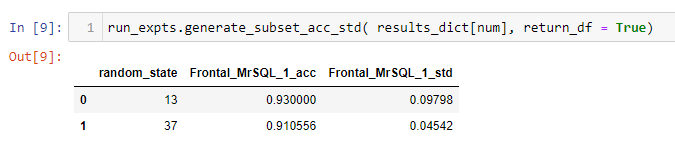

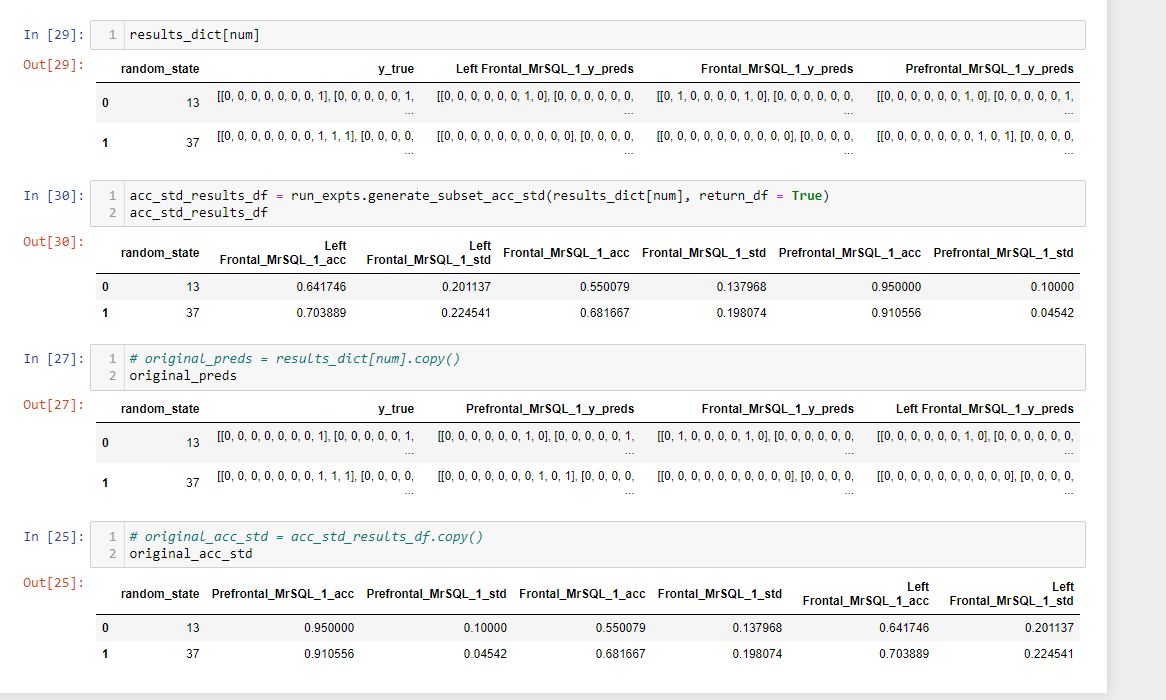

In [10]:
#Sktime imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sktime.classification.shapelet_based import MrSEQLClassifier
from sklearn.model_selection import GroupShuffleSplit

from IPython.utils import io
import pandas as pd
import os
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import seaborn as sns
import time
import joblib
import sys
from os.path import exists

import importlib

#EEG package modules_____________________________________________________________________________

import constants
import custom_ts_length
# import eeg_stat_ts
import format_eeg_data
import run_expts

#Load the appropriate data ________________________________________________________________________
'''
o 1. PD vs HC,   2.(PD , PD+RBD) vs HC,   3.(PD + PD&RBD) vs HC vs RBD  multiclass, 4.PD vs PD+RBD vs RBD vs HC 
'''
core_path = '/export/sphere/ebirah/ko20929/RBD_files/notebooks/frequency_analysis/constructed_data/band_power_time_series/expt_dfs/'
folder = 'REM_full_expts/'
#Load the appropriate X (full set of features ) , y (full set of labels) , groups 
load_path = core_path + folder
X = pd.read_hdf(load_path + 'X.h5', key='df', mode='r')
y = pd.read_hdf(load_path + 'y_full.h5', key='df', mode='r') 
groups = pd.read_hdf(load_path + 'groups.h5', key='df', mode='r')  

clfs = {'MrSQL_1' : MrSEQLClassifier(seql_mode='fs', symrep=[ 'sfa' , 'sax']) }

subset_names_and_cols = run_expts.gen_subsets_dict()

In [44]:
subsets_dict_new

{'Delta_Prefrontal': ['Delta_Prefrontal'],
 'Theta_Prefrontal': ['Theta_Prefrontal'],
 'Alpha_Prefrontal': ['Alpha_Prefrontal'],
 'Sigma_Prefrontal': ['Sigma_Prefrontal'],
 'Beta_Prefrontal': ['Beta_Prefrontal'],
 'Gamma_Prefrontal': ['Gamma_Prefrontal'],
 'TotalAbsPow_Prefrontal': ['TotalAbsPow_Prefrontal']}

In [45]:
power_band_cols = ['Delta', 'Theta', 'Alpha', 'Sigma', 'Beta', 'Gamma', 'TotalAbsPow']

subsets_dict_new = {}
for col in power_band_cols:
    name = col + '_' + 'Prefrontal'
    subsets_dict_new[name] = [name]

subsets_dict_new
subsets_reversed

delta_only = {'Delta_Prefrontal': ['Delta_Prefrontal']}

theta_only = {'Theta_Prefrontal': ['Theta_Prefrontal']}

In [46]:
results_dict = {}
# for num in [1,2,3,4]:
for num in [1]:
    print('commencing for ' + str(num) + '...')

    #1.Generate expt specific X,y,groups
    X_expt , y_expt , groups_expt, expt_info = run_expts.generate_expt_x_y_groups(X,y,groups,num)

    t1 = time.time()
    results_df = run_expts.run_mv_tsc(X_expt ,y_expt , groups_expt, clfs , return_df = True, subset_names_and_cols = theta_only, random_states = [13 , 37])
    
    t2 = time.time()
    
    results_dict[num] = results_df
    
print(t2-t1)

commencing for 1...
18.963788509368896


In [50]:
import gc

del df_name

gc.collect()



In [47]:
all_bpw_preds

,random_state,y_true,TotalAbsPow_Prefrontal_MrSQL_1_y_preds,Gamma_Prefrontal_MrSQL_1_y_preds,Beta_Prefrontal_MrSQL_1_y_preds,Sigma_Prefrontal_MrSQL_1_y_preds,Alpha_Prefrontal_MrSQL_1_y_preds,Theta_Prefrontal_MrSQL_1_y_preds,Delta_Prefrontal_MrSQL_1_y_preds
0,13,"[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, ...","[[1, 1, 1, 0, 1, 1, 0, 0], [1, 0, 0, 0, 0, 1, ...","[[1, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, ...","[[0, 1, 1, 1, 1, 0, 1, 0], [1, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, ...","[[1, 1, 0, 1, 1, 0, 1, 0], [1, 1, 0, 0, 0, 0, ...","[[0, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 0, ..."
1,37,"[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, ...","[[0, 0, 0, 0, 1, 1, 1, 0, 0, 0], [1, 0, 0, 1, ...","[[1, 1, 1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, ...","[[0, 0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, ...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ...","[[1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, ...","[[1, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, ..."


In [48]:
results_dict[num]

,random_state,y_true,Theta_Prefrontal_MrSQL_1_y_preds
0,13,"[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, ...","[[0, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, ..."
1,37,"[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, ...","[[1, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, ..."


In [38]:
df_test = results_dict[num].iloc[:,  :3].copy()
df_test

,random_state,y_true,TotalAbsPow_Prefrontal_MrSQL_1_y_preds
0,13,"[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, ...","[[1, 1, 1, 0, 1, 1, 0, 0], [1, 0, 0, 0, 0, 1, ..."
1,37,"[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, ...","[[0, 0, 0, 0, 1, 1, 1, 0, 0, 0], [1, 0, 0, 1, ..."


In [49]:
df = run_expts.generate_subset_acc_std( results_dict[num], return_df = True)
df

,random_state,Theta_Prefrontal_MrSQL_1_acc,Theta_Prefrontal_MrSQL_1_std
0,13,0.550079,0.137968
1,37,0.490556,0.249540


In [26]:
# results_orig_order = df.copy()
results_orig_order

,random_state,Delta_Prefrontal_MrSQL_1_acc,Delta_Prefrontal_MrSQL_1_std,Theta_Prefrontal_MrSQL_1_acc,Theta_Prefrontal_MrSQL_1_std,Alpha_Prefrontal_MrSQL_1_acc,Alpha_Prefrontal_MrSQL_1_std,Sigma_Prefrontal_MrSQL_1_acc,Sigma_Prefrontal_MrSQL_1_std,Beta_Prefrontal_MrSQL_1_acc,Beta_Prefrontal_MrSQL_1_std,Gamma_Prefrontal_MrSQL_1_acc,Gamma_Prefrontal_MrSQL_1_std,TotalAbsPow_Prefrontal_MrSQL_1_acc,TotalAbsPow_Prefrontal_MrSQL_1_std
0,13,0.645079,0.215194,0.550079,0.137968,0.424286,0.164009,0.530635,0.186864,0.452857,0.169398,0.517937,0.149777,0.462381,0.190144
1,37,0.659444,0.178882,0.490556,0.249540,0.463889,0.153055,0.636667,0.205228,0.575000,0.138221,0.579444,0.214876,0.488333,0.147158
